In [0]:
import pandas as pd
import numpy as np
import seaborn as sb
import nltk
from nltk.stem import SnowballStemmer
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer




* ## Data Pre_Processing

In [2]:

test = pd.read_csv('test.csv')
train = pd.read_csv('train2.csv')


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (3,5,6,7,9,27,28,29,30,31,32,33,34,40,41,42,43,44,45,46,47,48,49,55,56,57,58,59,60,61,62,64,70,71,72,73,74,75,76,79,85,86,87,88,89,90,91,93,94,100,101,102,103,104,105,106,107,108,109,115,116,117,118,119,120,121,123,124,130) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [22]:
test.head()

,Column 2,Label,Statement,Statement1
0,0,TRUE,Building a wall on the U.S.-Mexico border will...,"Meantime, engineering experts agree the wall w..."
1,1,FALSE,Wisconsin is on pace to double the number of l...,She cited layoff notices received by the state...
2,2,FALSE,Says John McCain has done nothing to help the ...,"Trump said that McCain ""has done nothing to he..."
3,3,half-true,Suzanne Bonamici supports a plan that will cut...,"But spending still goes up. In addition, many ..."
4,4,pants-fire,When asked by a reporter whether hes at the ce...,Our rating A Democratic Party web video making...


In [4]:
train.head()

,Column 2,Label,Statement,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,...,Unnamed: 91,Unnamed: 92,Unnamed: 93,Unnamed: 94,Unnamed: 95,Unnamed: 96,Unnamed: 97,Unnamed: 98,Unnamed: 99,Unnamed: 100,Unnamed: 101,Unnamed: 102,Unnamed: 103,Unnamed: 104,Unnamed: 105,Unnamed: 106,Unnamed: 107,Unnamed: 108,Unnamed: 109,Unnamed: 110,Unnamed: 111,Unnamed: 112,Unnamed: 113,Unnamed: 114,Unnamed: 115,Unnamed: 116,Unnamed: 117,Unnamed: 118,Unnamed: 119,Unnamed: 120,Unnamed: 121,Unnamed: 122,Unnamed: 123,Unnamed: 124,Unnamed: 125,Unnamed: 126,Unnamed: 127,Unnamed: 128,Unnamed: 129,Unnamed: 130
0,0,FALSE,Says the Annies List political group supports ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,half-true,When did the decline of coal start? It started...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,mostly-true,"""Hillary Clinton agrees with John McCain """"by ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,8,half-true,"However, it took $19.5 million in Oregon Lotte...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,9,mostly-true,Says GOP primary opponents Glenn Grothman and ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Data Cleaning...

In [5]:
def Data_Clean():
  print("Processing...")
# Train
  train.isnull().sum()
  train.info()


# Test
  test.isnull().sum()
  test.info()


Data_Clean()
print("Cleaning over..")

Processing...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5012 entries, 0 to 5011
Columns: 131 entries, Column 2 to Unnamed: 130
dtypes: float64(46), int64(1), object(84)
memory usage: 5.0+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1267 entries, 0 to 1266
Data columns (total 4 columns):
Column 2      1267 non-null int64
Label         1267 non-null object
Statement     1267 non-null object
Statement1    1258 non-null object
dtypes: int64(1), object(3)
memory usage: 39.7+ KB
Cleaning over..


In [9]:
train.head()

,Column 2,Label,Statement,Statement1,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,...,Unnamed: 368,Unnamed: 369,Unnamed: 370,Unnamed: 371,Unnamed: 372,Unnamed: 373,Unnamed: 374,Unnamed: 375,Unnamed: 376,Unnamed: 377,Unnamed: 378,Unnamed: 379,Unnamed: 380,Unnamed: 381,Unnamed: 382,Unnamed: 383,Unnamed: 384,Unnamed: 385,Unnamed: 386,Unnamed: 387,Unnamed: 388,Unnamed: 389,Unnamed: 390,Unnamed: 391,Unnamed: 392,Unnamed: 393,Unnamed: 394,Unnamed: 395,Unnamed: 396,Unnamed: 397,Unnamed: 398,Unnamed: 399,Unnamed: 400,Unnamed: 401,Unnamed: 402,Unnamed: 403,Unnamed: 404,Unnamed: 405,Unnamed: 406,Unnamed: 407
0,0,FALSE,Says the Annies List political group supports ...,That's a premise that he fails to back up. Ann...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,half-true,When did the decline of coal start? It started...,"""Surovell said the decline of coal """"started w...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,mostly-true,"""Hillary Clinton agrees with John McCain """"by ...","""Obama said he would have voted against the am...",1123.json,FALSE,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19,3,5,44,a news release,"""The release may have a point that Mikulskis c...",9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15,9,20,19,2,an interview on CNN,"""Crist said that the economic """"turnaround sta...",12465.json,TRUE,The Chicago Bears have had more starting quart...,education,robin-vos,Wisconsin Assembly speaker,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,8,half-true,"However, it took $19.5 million in Oregon Lotte...",But Johnson is correct that many other factors...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,9,mostly-true,Says GOP primary opponents Glenn Grothman and ...,"""Considering that the $532 million figure cove...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Shape of each set

print("Shape of TRAIN DATA: ", train.shape)
print("Shape of TEST DATA: ", test.shape)


Shape of TRAIN DATA:  (5012, 131)
Shape of TEST DATA:  (1267, 4)


In [7]:
train.describe(), test.describe()

(           Column 2  Unnamed: 8  ...  Unnamed: 128  Unnamed: 129
 count   5012.000000    7.000000  ...           1.0           1.0
 mean    5032.917598   27.857143  ...          10.0           1.0
 std     2971.190640   60.028961  ...           NaN           NaN
 min        0.000000    0.000000  ...          10.0           1.0
 25%     2480.750000    0.500000  ...          10.0           1.0
 50%     4922.500000    1.000000  ...          10.0           1.0
 75%     7667.250000   15.000000  ...          10.0           1.0
 max    10239.000000  163.000000  ...          10.0           1.0
 
 [8 rows x 47 columns],           Column 2
 count  1267.000000
 mean    633.000000
 std     365.895705
 min       0.000000
 25%     316.500000
 50%     633.000000
 75%     949.500000
 max    1266.000000)

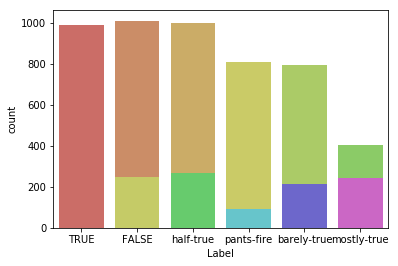

In [8]:
# Distribution of classes for prediction
def Class_Distr(datafile):
  return sb.countplot(x='Label' , data= datafile, palette='hls')

# Even Distribution of data between Train,Test and Valid dataset

Class_Distr(train)
Class_Distr(test)


In [0]:
# Saving the original Data for future

train_orig = train.copy()
test_orig = test.copy()


In [0]:
# Stemming 

def stemming(str_tokens, str_stemmer):
  stemmed_str = []
  for token_i in str_token:
    stemmed.append(str_stemmer.stem(token_i))

  return stemmed



In [0]:
# Data process

def data_process(data, exclude_stopword = True, stem = True):
  str_tokens = [w.lower() for w in data]
  stemmed_tokens = str_tokens
  stemmed_tokens = stemming(str_tokens, eng_stemmer)
  stemmed_tokens = [w for w in stemmed_tokens if w not in stopwords ]
  
  return tokens_stemmed
  

In [0]:
 
#creating ngrams
#unigram 
def create_unigram(words):
    assert type(words) == list
    return words

#bigram
def create_bigrams(words):
    assert type(words) == list
    gap = 0
    joinned_str = " "
    Len = len(words)
    if Len > 1:
        lst = []
        for i in range(Len-1):
            for k in range(1,gap+2):
                if i+k < Len:
                    lst.append(joinned_str.join([words[i],words[i+k]]))
    else:
        #set it as unigram
        lst = create_unigram(words)
    return lst

In [0]:
# Trigram creation

def create_trigrams(words):
    assert type(words) == list
    gap == 0
    joinned_str = " "
    Len = len(words)
    if L > 2:
        lst = []
        for i in range(1,gap+2):
            for k1 in range(1, gap+2):
                for k2 in range(1,gap+2):
                    if i+k1 < Len and i+k1+k2 < Len:
                        lst.append(joinned_str.join([words[i], words[i+k1],words[i+k1+k2]]))
        else:
            #set is as bigram
            lst = create_bigram(words)
    return lst

In [0]:
porter_str = PorterStemmer()

In [0]:
def porter_tokenizer(statement):
    return [porter.stem(word) for word in statement.split()]


* ## Feature Scalling..

In [16]:
! pip install gensim


In [17]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer

import nltk
import nltk.corpus
from nltk.tokenize import word_tokenize
from gensim.models.word2vec import Word2Vec
from sklearn.pipeline import Pipeline
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown.zip.
[nltk_data]    | Downloading package brown_tei to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown_tei.zip.
[nltk_data]    | Downloading package cess_cat to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_cat.zip.
[nltk_data]    | Downloading package cess_esp to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_esp.zip.
[nltk_data]    | Downloading package chat80 to /root/nltk_data...
[nltk_data]    |   Unzipp

True

In [18]:
# creating word matrix  with bag of word technique
countV = CountVectorizer()
train_count = countV.fit_transform(train['Statement'].values)

print(countV)
print(train_count)

def countVectorizer_matrix():
    
    #vocab size
    train_count.shape

    #check vocabulary using below command
    print(countV.vocabulary_)

    #get feature names
    print(countV.get_feature_names()[:25])



CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)
  (0, 6937)	1
  (0, 7856)	1
  (0, 725)	1
  (0, 4756)	1
  (0, 5981)	1
  (0, 3660)	1
  (0, 7660)	1
  (0, 7885)	1
  (0, 8078)	1
  (0, 425)	1
  (0, 5529)	1
  (0, 2350)	1
  (1, 7856)	1
  (1, 8544)	2
  (1, 2465)	1
  (1, 2274)	1
  (1, 5492)	1
  (1, 1762)	1
  (1, 7455)	1
  (1, 4335)	1
  (1, 7456)	2
  (1, 5314)	1
  (1, 3479)	1
  (1, 7962)	1
  (1, 5493)	1
  :	:
  (5011, 7856)	1
  (5011, 5492)	2
  (5011, 7939)	2
  (5011, 5611)	1
  (5011, 5608)	1
  (5011, 3759)	1
  (5011, 4528)	1
  (5011, 8690)	2
  (5011, 810)	1
  (5011, 7869)	1
  (5011, 2376)	1
  (5011, 8696)	1
  (5011, 7862)	1
  (5011, 83

In [0]:
# create tf-df features 
tfidfV = TfidfTransformer()

train_tfidf = tfidfV.fit_transform(train_count)




In [0]:


def tfidf_matrix():
    train_tfidf.shape
    #get train data feature names 
    print(train_tfidf.A[:10])


#bag of words - with n-grams
#tfidf_ngram  = TfidfTransformer(use_idf=True,smooth_idf=True)

tfidf_ngram = TfidfVectorizer(stop_words='english',ngram_range=(1,4),use_idf = True,smooth_idf = True)



In [21]:
# Tags
nltk.download('averaged_perceptron_tagger')
tagged_sentences = nltk.corpus.treebank.tagged_sents()

cutoff = int(.75 * len(tagged_sentences))
training_sentences = train['Statement']
 
print(training_sentences)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
0       Says the Annies List political group supports ...
1       When did the decline of coal start? It started...
2       "Hillary Clinton agrees with John McCain ""by ...
3       However, it took $19.5 million in Oregon Lotte...
4       Says GOP primary opponents Glenn Grothman and ...
5       For the first time in history, the share of th...
6       Since 2000, nearly 12 million Americans have s...
7       When Mitt Romney was governor of Massachusetts...
8       The economy bled $24 billion due to the govern...
9       Most of the (Affordable Care Act) has already ...
10      In this last election in November, ... 63 perc...
11      McCain opposed a requirement that the governme...
12      The United States has the highest corporate ta...
13      We just had the best year for the auto industr...


In [0]:

def features_Scale(sentence, index):
    """ sentence: [w1, w2, ...], index: the index of the word """
    return {
        'word': sentence[index],
        'is_first': index == 0,
        'is_last': index == len(sentence) - 1,
        'is_capitalized': sentence[index][0].upper() == sentence[index][0],
        'is_all_caps': sentence[index].upper() == sentence[index],
        'is_all_lower': sentence[index].lower() == sentence[index],
        'prefix-1': sentence[index][0],
        'prefix-2': sentence[index][:2],
        'prefix-3': sentence[index][:3],
        'suffix-1': sentence[index][-1],
        'suffix-2': sentence[index][-2:],
        'suffix-3': sentence[index][-3:],
        'prev_word': '' if index == 0 else sentence[index - 1],
        'next_word': '' if index == len(sentence) - 1 else sentence[index + 1],
        'has_hyphen': '-' in sentence[index],
        'is_numeric': sentence[index].isdigit(),
        'capitals_inside': sentence[index][1:].lower() != sentence[index][1:]
    }
    

In [0]:
# Fuction to strips the tags

def untagging(tagged_sentences):
  return [w for w,t in tagged_sentences]

# Applying Word2vec

with open("glove.6B.50d.txt", "rb") as lines:
  w2v = {line.split()[0]: np.array(map(float, line.split()[1:]))
           for line in lines}

class MeanEmbeddingVectorizer(object):
    def __init__(self, word2vec):
        self.word2vec = word2vec
        # if a text is empty we should return a vector of zeros
        # with the same dimensionality as all the other vectors
        self.dim = len(word2vec.itervalues().next())

    def fit(self, X, y):
        return self

    def transform(self, X):
        return np.array([
            np.mean([self.word2vec[w] for w in words if w in self.word2vec]
                    or [np.zeros(self.dim)], axis=0)
            for words in X
        ])

In [0]:

class MeanEmbeddingVectorizer(object):
    def __init__(self, word2vec):
        self.word2vec = word2vec
        # if a text is empty we should return a vector of zeros
        # with the same dimensionality as all the other vectors
        self.dim = len(word2vec.itervalues().next())

    def fit(self, X, y):
        return self

    def transform(self, X):
        return np.array([
            np.mean([self.word2vec[w] for w in words if w in self.word2vec]
                    or [np.zeros(self.dim)], axis=0)
            for words in X
        ])


* ## Classification
* Six-Way Classification

In [0]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import learning_curve,  GridSearchCV
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
#from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score



In [0]:
#string to test
#doc_new = ['Says Rush Limbaugh made it clear hed rather see the country fail than President Barack Obama succeed.']

statement_doc = ['We are already almost halfway to our 2010 goal of creating 700,000 new jobs in seven years.']



* Using Bag Words Technique

using previous features that we scalled we classify the dataset with:
* Random Forest Classification Algorithm


In [66]:
#Random Forest
random_forest = Pipeline([
        ('rfCV',countV),
        ('rf_clf',RandomForestClassifier(n_estimators=350,n_jobs=3))
        ])
print("Accuracy: ")    
random_forest.fit(train['Statement'],train['Label'])
predicted_rf = random_forest.predict(test['Statement'])
np.mean(predicted_rf == test['Label'])




Accuracy: 


0.27308602999210735

In [0]:
# # from sklearn import svm
# # from sklearn.feature_selection import FeatureSelection

# # svm_pipeline = Pipeline([
# #         ('svm2CV',FeatureSelection.countV),
# #         ('svm2_clf',SGDClassifier(loss='hinge', penalty='l2', alpha=1e-3, n_iter=5))
# #         ])

# # svm_pipeline.fit(train['Statement'],train['Label'])
# # predicted_svm = svm_pipeline.predict(test['Statement'])
# # np.mean(predicted_svm == test['Label'])

# import pandas as pd
# import numpy as np
# import keras
# import keras.utils
# from keras import utils as np_utils
# import matplotlib.pyplot as plt
# %matplotlib inline
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import LabelEncoder
# from keras.models import Model
# from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
# from keras.optimizers import RMSprop
# from keras.preprocessing.text import Tokenizer
# from keras.preprocessing import sequence
# from keras.utils import to_categorical
# from keras.callbacks import EarlyStopping
# from keras import regularizers
# from keras import optimizers
# from keras.models import Sequential
# import tensorflow as tf

# from getEmbeddings import getEmbeddings
import matplotlib.pyplot as plt
import numpy as np
import keras
from keras import backend as K
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Embedding, Input, RepeatVector
from keras.optimizers import SGD
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
# import scikitplot.plotters as skplt

# max_words = 1000
# max_len = 150
# tok = Tokenizer(num_words=max_words)
# tok.fit_on_texts(train)
# sequences = tok.texts_to_sequences(train['Statement'])
# sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)

# model = keras.Sequential([keras.layers.Flatten(input_shape = train.shape),
#                 keras.layers.Dense(128,activation = tf.nn.sigmoid),                          
#                 keras.layers.Dense(10,activation = tf.nn.softmax)])
# model.compile(optimizer = 'adam',loss='sparse_categorical_crossentropy',metrics =['accuracy'])
# def baseline_model():
#     '''Neural network with 3 hidden layers'''
#     model = Sequential()
#     model.add(Dense(256, input_dim=300, activation='relu', kernel_initializer='normal'))
#     model.add(Dropout(0.3))
#     model.add(Dense(256, activation='relu', kernel_initializer='normal'))
#     model.add(Dropout(0.5))
#     model.add(Dense(80, activation='relu', kernel_initializer='normal'))
#     model.add(Dense(2, activation="softmax", kernel_initializer='normal'))

#     # gradient descent
#     sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
    
#     # configure the learning process of the model
#     model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
#     return model


# model = baseline_model()
# model.summary()
# # x_train, x_test, y_train, y_test = train_test_split(xtr, ytr, test_size=0.2, random_state=42)
# label_encoder = LabelEncoder()
# label_encoder.fit(train['Label'])# state->label
# encoded_y = np_utils.to_categorical((label_encoder.transform(train['Label'])))## y_train=train['Statement'], x_test=test['Label']
# label_encoder.fit(test['Label'])
# encoded_test['Statement'] = np_utils.to_categorical((label_encoder.transform(test['Statement'])))
# estimator = model.fit(train['Statement'], encoded_y, epochs=20, batch_size=64)
# print("Model Trained!")
# score = model.evaluate(test['Label'], encoded_test['Statement'])
# print("")
# print("Accuracy = " + format(score[1]*100, '.2f') + "%")   


In [0]:
# model.fit(train['Statement'], train['Label'],epochs = 5)


In [35]:
! pip install -U Scikit-learn

Requirement already up-to-date: Scikit-learn in /usr/local/lib/python3.6/dist-packages (0.21.3)


In [67]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

print("Confusion Matrix ==> \n\n", confusion_matrix(test['Label'], predicted_rf))
print("\n\n Accuracy Score: ", accuracy_score(test['Label'], predicted_rf)*100)

print("\n____________________________________________________________________\n")
print("Classification Report of Random Forest: \n\n", classification_report(test['Label'], predicted_rf))

Confusion Matrix ==> 

 [[132  13  12  38  54   0]
 [ 68  28   4  27  81   0]
 [ 89  14  20  39  50   0]
 [ 99  15  16  65  70   0]
 [ 66  22   9  45  99   0]
 [ 45   2   8  18  17   2]]


 Accuracy Score:  27.308602999210734

____________________________________________________________________

Classification Report of Random Forest: 

               precision    recall  f1-score   support

       FALSE       0.26      0.53      0.35       249
        TRUE       0.30      0.13      0.19       208
 barely-true       0.29      0.09      0.14       212
   half-true       0.28      0.25      0.26       265
 mostly-true       0.27      0.41      0.32       241
  pants-fire       1.00      0.02      0.04        92

    accuracy                           0.27      1267
   macro avg       0.40      0.24      0.22      1267
weighted avg       0.33      0.27      0.24      1267



* ## Prediction Test of a Model...

In [0]:
Saved_model = 'Model.sav'
pickle.dump(random_forest,open(Saved_model,'wb'))

In [58]:
import pickle
# some testing news
# We are already almost halfway to our 2010 goal of creating 700,000 new jobs in seven years.
# Medicaid spending declined by 1.9 percent in 2012, the second such decline in 47 years.
var = input("Enter the news text you want to test or verify: ")
print("Your Entry: " + str(var))


# Here we go with the prediction:
def detecting_fake_news(var):    
    load_model = pickle.load(open('Model.sav', 'rb'))
    prediction = load_model.predict([var])
    prob = load_model.predict_proba([var])

    return (print("Folowing Statement predicted as:  ",prediction[0]),
        print("The truth probability score will be:  ",prob[0][1]))
  
if __name__ == '__main__':
    detecting_fake_news(var)


Enter the news text you want to test or verify: Medicaid spending declined by 1.9 percent in 2012, the second such decline in 47 years.
Your Entry: Medicaid spending declined by 1.9 percent in 2012, the second such decline in 47 years.
Folowing Statement predicted as:   mostly-true
The truth probability score will be:   0.09333333333333334
